# APRESENTAÇÃO

INTRODUÇÃO

NOTAS:
1. Para executar o código, rodar NA SEQUÊNCIA todas as celulas dos itens 2, 3, 4 e 5 (nesse ultimo caso, se aplicável, para salvar o arquivo);

# CÓDIGO

## 1. CONEXÕES, IMPORTAÇÕES E CARREGAMENTOS

2.1 - CONEXÕES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.2 - IMPORTAÇÕES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
print('Conectado')

Conectado


2.3 - CARREGAMENTOS

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/2_REPOSITORIOS/PYTHON/PTH_003_EMPRESAS_UNICORNIO/Startups+in+2021+end.csv')
df.shape

(936, 8)

## 2. ETL

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#Convertendo o tipo da coluna 'data de adesão' para data
df['Date Joined']=pd.to_datetime(df['Date Joined'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        936 non-null    int64         
 1   Company           936 non-null    object        
 2   Valuation ($B)    936 non-null    object        
 3   Date Joined       936 non-null    datetime64[ns]
 4   Country           936 non-null    object        
 5   City              921 non-null    object        
 6   Industry          936 non-null    object        
 7   Select Investors  935 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 58.6+ KB


In [ ]:
#Convertendo o tipo da culona 'Valuation ($B)' para numero decimal
df['Valuation ($B)'] = pd.to_numeric(df['Valuation ($B)'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        936 non-null    int64         
 1   Company           936 non-null    object        
 2   Valuation ($B)    0 non-null      float64       
 3   Date Joined       936 non-null    datetime64[ns]
 4   Country           936 non-null    object        
 5   City              921 non-null    object        
 6   Industry          936 non-null    object        
 7   Select Investors  935 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 58.6+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
#Alterar nome das colunas
df.rename(columns={
    'Unnamed: 0':'Id',
    'Company':'Empresa',
    'Valuation ($B)':'Valor ($)',
    'Date Joined':'Data de adesão',
    'Country':'País',
    'City':'Cidade',
    'Industry':'Setor',
    'Industry':'Setor',
    'Select Investors':'Investidores'
}, inplace=True)
df.columns

Index(['Id', 'Empresa', 'Valor ($)', 'Data de adesão', 'País', 'Cidade',
       'Setor', 'Investidores'],
      dtype='object')

In [ ]:
#verificando campos nulos
df.isnull().sum()

,0
Id,0
Empresa,0
Valor ($),936
Data de adesão,0
País,0
Cidade,15
Setor,0
Investidores,1


In [ ]:
#verificando campos unicos
df.nunique()

,0
Id,936
Empresa,935
Valor ($),192
Data de adesão,589
País,47
Cidade,239
Setor,17
Investidores,920


In [ ]:
df['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [ ]:
df['Setor'].value_counts()

,count
Setor,
Fintech,190
Internet software & services,167
E-commerce & direct-to-consumer,102
Artificial intelligence,69
Health,63
"Supply chain, logistics, & delivery",51
Other,51
Cybersecurity,41
Mobile & telecommunications,37


In [ ]:
df['Setor'].value_counts(normalize=True)

,proportion
Setor,
Fintech,0.202991
Internet software & services,0.178419
E-commerce & direct-to-consumer,0.108974
Artificial intelligence,0.073718
Health,0.067308
"Supply chain, logistics, & delivery",0.054487
Other,0.054487
Cybersecurity,0.043803
Mobile & telecommunications,0.039530


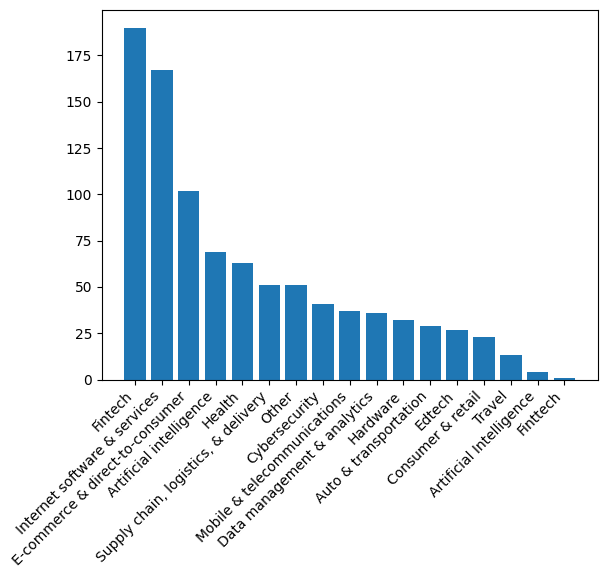

In [ ]:
x1=df['Setor'].value_counts()
plt.bar(x1.index,x1)
plt.xticks(rotation=45,ha='right');

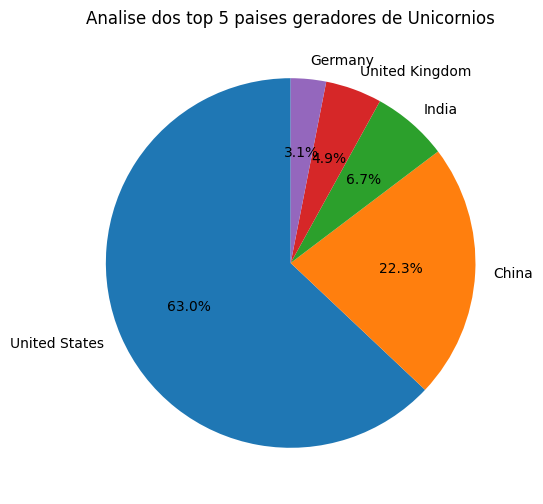

In [ ]:
# Analise = df['País'].value_counts(normalize=True)*100
Analise = round(df['País'].value_counts(normalize=True)*100,1)
plt.figure(figsize=(15,6))
plt.title('Analise dos top 5 paises geradores de Unicornios')
plt.pie(
    Analise.head(5),
    labels=Analise.index[0:5],
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
);

In [ ]:
#Convertendo o tipo da coluna'data de adesão'
df['Data de adesão']=pd.to_datetime(df['Data de adesão'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor ($)       936 non-null    object        
 3   Data de adesão  936 non-null    datetime64[ns]
 4   País            936 non-null    object        
 5   Cidade          921 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    935 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 58.6+ KB


In [ ]:
df['mes']=pd.DatetimeIndex(df['Data de adesão']).month
df['ano']=pd.DatetimeIndex(df['Data de adesão']).year
df.head(1)

,Id,Empresa,Valor ($),Data de adesão,País,Cidade,Setor,Investidores,mes,ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017


In [ ]:
#Tabela analitica
analise_agrupada=df.groupby(by=['País','ano','mes','Empresa']).count()['Id'].reset_index()
analise_agrupada

,País,ano,mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [ ]:
analise_agrupada.loc[
    analise_agrupada['País']=='Brazil'
]

,País,ano,mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [ ]:
#remove o simbolo $ e converte a coluna de objeto para decimal
df['Valor ($)']=pd.to_numeric(df['Valor ($)'].apply(lambda linha:linha.replace('$','')))
df.head()

,Id,Empresa,Valor ($),Data de adesão,País,Cidade,Setor,Investidores
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
analise_pais=df.groupby(by=['País']).sum()['Valor ($)'].reset_index()
analise_pais.head()

,País,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [ ]:
analise_valor=analise_pais.sort_values('Valor ($)',ascending=False)
analise_valor.head()

,País,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


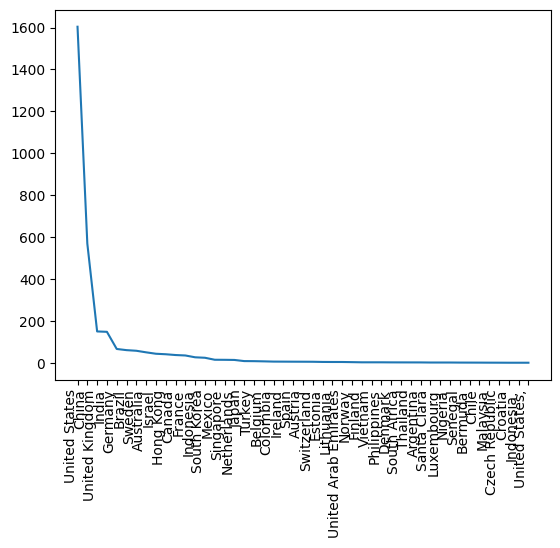

In [ ]:
plt.plot(analise_valor['País'],analise_valor['Valor ($)'])
plt.xticks(rotation=90,ha='right');

In [ ]:
#NOme das colunas
df.head(1)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."


## 3. ANÁLISE

## 4. SALVAMENTO DA ANALISE